In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from scipy.spatial import distance

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.mixture import GaussianMixture

In [ ]:
uploaded = files.upload()

Saving yeast.tsv to yeast.tsv


# Data retrieval, pre-processing, and parameter Setup

Pre-processing includes imputation and shifting.

Parameter setup includes k (cluster number) and SSE difference threshold.

In [ ]:
#DATA PRE-PROCESSING

#Access the data
yeast = pd.read_csv('yeast.tsv', sep = '\t')

#Fill out missing data with df.interpolate() for row-wise interpolation
pd.set_option('display.max_rows', 10)
yeast = yeast.interpolate(axis=1)

#Some rows don't have enough information to interpolate, so perform column-wise interpolation
yeast = yeast.interpolate(axis=0)

yeast.index -= 1 #shift index to match yeast dataframe
print(yeast)

           0hr  9.5hr    11.5hr    13.5hr  15.5hr  18.5hr  20.5hr
0     0.165000  0.272  0.046000  0.429000   0.143 -0.2110   0.183
1     0.101000  0.237 -0.109000  0.149000   0.111 -0.1400   0.252
2     0.150000  0.469 -0.015000  0.144000   0.072  0.1150   0.215
3    -1.193000 -1.078 -0.963000 -0.510000  -2.392 -1.6655  -0.939
4    -0.741000  0.227 -0.986000 -0.048000  -1.277 -0.1940  -0.194
...        ...    ...       ...       ...     ...     ...     ...
6395 -0.000667  0.228  0.734667  1.241333   1.748  1.2830  -0.941
6396  0.065667  0.159  0.258833  0.562167   0.800  0.0475  -0.705
6397  0.132000  0.090 -0.217000 -0.117000   0.250 -0.0210  -0.021
6398  0.231000  0.218  0.044000  0.028000   0.252 -0.3570  -0.357
6399 -0.036000  0.241 -0.202000  0.099000   0.400 -0.5000  -0.500

[6400 rows x 7 columns]


In [ ]:
# PARAMETERS SETUP
k = 4 
thres = 1e-3

# K-Means Implementation 
Please run the Data Pre-Processing and Parameter Setup cells above!
Plotting included in this cell. Change the K-values on the block of code above (specifically on the Parameters Setup cell)

In [ ]:
#PUTTING EVERYTHING TOGETHER IN A WHILE LOOP
cluster = yeast.sample(n=k) #Choose random sample
loss = []

while True:
  fin_df = pd.DataFrame(columns = range(1,k+1)) #Declare final dataframe to store cluster belonging information

  #Find closest distance from datapoint to cluster 
  for index, row_p in yeast.iterrows(): #for each datapoint
    distances = []
    for index, row_c in cluster.iterrows(): #for each cluster
      # norm = np.linalg.norm(row_p-row_c)
      norm = distance.euclidean(row_p, row_c)
      distances.append(norm)
    min_index = np.argmin(distances) #index of min distance
    #Populate fin_df 
    location = np.zeros(k)
    location[min_index] = 1
    fin_df.loc[len(fin_df)] = location #append a row to fin_df
  

  #Get the updated cluster by taking index of each cluster
  clist = []
  for i in range(1,k+1):
    ind = fin_df.loc[fin_df[i]==1].index.tolist() #find index of datapoints that belong to the cluster
    a = yeast.loc[ind] #create a dataframe with datapoints that belong to that cluster only
    clust = a.mean().tolist()
    clist.append(clust)
    #print(a)
    

  #Assign the updated cluster to the original cluster dataframe
  coltitle = cluster.columns.tolist()
  count = 0
  for ind, row in cluster.iterrows(): #for each row in cluster
    # row = clist[count]
    for i in range(len(coltitle)): #loop each column
      tmp = clist[count] 
      row[coltitle[i]] = tmp[i]
    count += 1
  print(cluster)


  #Calculate SSE now that the cluster is updated
  sse = 0
  for idx, row_c in cluster.iterrows(): #for every cluster
    cnum = 1 #counter for cluster
    ind = fin_df.loc[fin_df[cnum]==1].index.tolist() #find index of datapoints that belong to the cluster
    a = yeast.loc[ind] 
    
    #Find average distance
    dist = 0
    for idx, row_p in a.iterrows(): #for every point in that cluster, obtain avg_dist
      # norm = np.linalg.norm(row_p-row_c)
      norm = distance.euclidean(row_p, row_c)
      dist += norm
    avg_dist = dist / a.shape[0]

    error = 0
    for idx, row_p in a.iterrows(): #for every point in cluster, get error
      error += (np.linalg.norm(row_p-row_c) - avg_dist)**2

    sse += error

  loss.append(sse)
  print("Your SSE is",loss)

  if len(loss) > 2 and abs(loss[-2] - loss[-1]) < thres:
    break

           0hr     9.5hr    11.5hr    13.5hr    15.5hr    18.5hr    20.5hr
315  -0.107635 -0.056823  0.135326  0.153169  0.159167  0.877340  0.802059
4883  0.047612  0.059132 -0.067642 -0.149906 -0.202746 -0.449623 -0.422771
Your SSE is [4791.770783804463]
           0hr     9.5hr    11.5hr    13.5hr    15.5hr    18.5hr    20.5hr
315  -0.105829 -0.056922  0.139381  0.158365  0.173888  0.889961  0.828859
4883  0.041380  0.055862 -0.065626 -0.146074 -0.206305 -0.423166 -0.412824
Your SSE is [4791.770783804463, 4633.3006942805705]
           0hr     9.5hr    11.5hr    13.5hr    15.5hr    18.5hr    20.5hr
315  -0.107306 -0.057044  0.142201  0.161930  0.180087  0.902988  0.843254
4883  0.039824  0.053744 -0.064159 -0.143324 -0.204474 -0.409152 -0.401477
Your SSE is [4791.770783804463, 4633.3006942805705, 4542.0637632982425]
           0hr     9.5hr    11.5hr    13.5hr    15.5hr    18.5hr    20.5hr
315  -0.107302 -0.057484  0.145034  0.164179  0.183016  0.912534  0.851967
4883  0.037950  0.0

In [ ]:
#Post Processing
#Append which cluster each datapoint belongs to, to the dataframe yeast_df
title = fin_df.columns.tolist()
loc = [] #list of 1-k, telling us which cluster it belongs to
for idx, rows in fin_df.iterrows(): #for each row
  for i in range(len(title)): #in the column
    if(rows[title[i]]) == 1:
      loc.append(title[i])

yeast_df = yeast
yeast_df['loc'] = pd.Series(loc)

In [ ]:
#Recall the yeast data
yeast = pd.read_csv('yeast.tsv', sep = '\t')

#Fill out missing data with df.interpolate() for row-wise interpolation
pd.set_option('display.max_rows', 10)
yeast = yeast.interpolate(axis=1)

#Some rows don't have enough information to interpolate, so perform column-wise interpolation
yeast = yeast.interpolate(axis=0)

yeast.index -= 1 #shift index to match yeast dataframe
# yeast

,0hr,9.5hr,11.5hr,13.5hr,15.5hr,18.5hr,20.5hr
0,0.165000,0.272,0.046000,0.429000,0.143,-0.2110,0.183
1,0.101000,0.237,-0.109000,0.149000,0.111,-0.1400,0.252
2,0.150000,0.469,-0.015000,0.144000,0.072,0.1150,0.215
3,-1.193000,-1.078,-0.963000,-0.510000,-2.392,-1.6655,-0.939
4,-0.741000,0.227,-0.986000,-0.048000,-1.277,-0.1940,-0.194
...,...,...,...,...,...,...,...
6395,-0.000667,0.228,0.734667,1.241333,1.748,1.2830,-0.941
6396,0.065667,0.159,0.258833,0.562167,0.800,0.0475,-0.705
6397,0.132000,0.090,-0.217000,-0.117000,0.250,-0.0210,-0.021
6398,0.231000,0.218,0.044000,0.028000,0.252,-0.3570,-0.357


In [ ]:
#PCA for Visualization
pca = PCA(n_components=2)
# X_scale = scale(yeast)
X_r = pca.fit_transform(yeast)

# cluster_scale = scale(cluster)
C_r = pca.transform(cluster)

Text(0.5, 1.0, 'Yeast kmeans clustering')

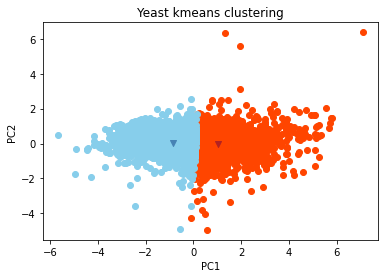

In [ ]:
warna = ['orangered','skyblue','palegreen','beige','mediumpurple', 'aqua', 'lightpink','dimgrey','black']
warna_cluster = ['firebrick', 'steelblue', 'olivedrab', 'darkgoldenrod', 'rebeccapurple', 'teal', 'crimson', 'gainsboro','white']
for c in range(1,len(np.unique(loc))+1):
  dc = yeast_df.index[yeast_df['loc']==c].tolist() #index that belongs to certain cluster
  plt.scatter(X_r[dc,0], X_r[dc,1], color = warna[c-1], zorder=-1)
  plt.scatter(C_r[c-1,0], C_r[c-1,1],  color = warna_cluster[c-1], marker = 'v')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Yeast kmeans clustering")

In [ ]:
#Plot loss function
lossdiff = []
for i in range(1,len(loss)):
  diff = abs(loss[i-1]-loss[i])
  lossdiff.append(diff)
plt.plot(lossdiff)
plt.xlabel("Iteration")
plt.ylabel("SSE Difference")
plt.title('Loss Difference throughout Different Iterations')

# GMM
It is advised to run the cells above before running this cell.

Text(0.5, 1.0, 'Yeast GMM clustering')

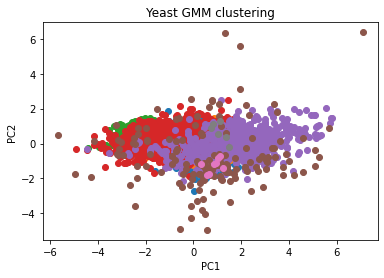

In [ ]:
#GMM Prep
frame = yeast
gmm = GaussianMixture(n_components = 8)
gmm.fit(frame)
labels = gmm.predict(frame)
labels = labels + 1 #shifting
frame['loc'] = labels

#Plotting
for c in range(1,len(np.unique(labels))+1):
  dc = frame.index[frame['loc']==c].tolist() #index that belongs to certain cluster
  plt.scatter(X_r[dc,0], X_r[dc,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Yeast GMM clustering")